In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df1 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2008/historical_data1_Q42008/historical_data1_Q42008.txt', low_memory=False, sep="|", header=None, \
                  names=['1. creditScore', '2. FirstPayment', '3. FirstTimeHomebuyer', '4. Maturity', '5. MetropolitanArea', '6. MorgageInsurancePercentage', '7. HouseUnits', '8. OccupancyStatus', '9. CombinedLoanToValue','10. DebtToIncome', '11. UPB', '12. OriginalLoanToValue', '13. OrigninalInterestRate', '14. Channel', '15. PrepaymentPenaltyMorgageFlag', '16. ProductType', '17. PropertyState', '18. PropertyType', '19. ZipCode', 'LoanSequenceNumber', '21. LoanPurpose', '22. OriginalLoanTerm', '23. NumberOfBorrowers', '24. SellerName', '25. ServiceName', '26. SuperConformFlag', '27. preHARPP'])
                  # dtypes={'1. creditScore': np.int})
df1.replace('',np.NaN)
df1.replace('NaN',np.NaN)

'''
display(df1.dtypes)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df1)
'''


/Users/Maxim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


"\ndisplay(df1.dtypes)\nwith pd.option_context('display.max_rows', 10, 'display.max_columns', None):\n    display(df1)\n"

In [2]:
df2 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2008/historical_data1_Q42008/historical_data1_time_Q42008.txt', low_memory=False, sep="|", header=None, names=['LoanSequenceNumber', '2. MonthlyReportingPeriod', '3. CurrentActualUPB', '4. CurrentLoanDeliquencyStatus', '5. LoanAge', '6. MonthsToLegalMaturity', '7. RepurchaseFlag', '8. ModificationFlag', '9. ZeroBalanceCode', '10. ZeroBalanceEffectiveDate', '11. CurrentInterestRate', '12. CurrentDefferedUPB', '13. DueDateLastOfPaidInstallment', '14. MorgageInsuranceRecoveries', '15. NetSalesProceeds', '16. NonMorgageInsuranceRecoveries', '17. Expenses', '18. LegalCosts', '19. MaintenanceAndPreservationCosts','20. TaxesAndInsurance', '21. MiscellaneousExpenses', '22. ActualLoss', '23. ModificationCosts'])
df2.replace('',np.NaN)
df2.replace('NaN',np.NaN)

'''
display(df2.dtypes)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df2)
'''

"\ndisplay(df2.dtypes)\nwith pd.option_context('display.max_rows', 10, 'display.max_columns', None):\n    display(df2)\n"

In [3]:
df = pd.merge(df1, df2, how='right', on = 'LoanSequenceNumber')

In [4]:
# Removing columns
df.drop(df.columns[len(df.columns)-11:len(df.columns)], axis=1, inplace=True)
df.drop(['8. OccupancyStatus', '14. Channel', '15. PrepaymentPenaltyMorgageFlag', '16. ProductType', '21. LoanPurpose', '24. SellerName', '25. ServiceName', '26. SuperConformFlag', '27. preHARPP', '6. MonthsToLegalMaturity', '7. RepurchaseFlag', '12. CurrentDefferedUPB'], 1, inplace=True)
'''with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df)'''

"with pd.option_context('display.max_rows', 100, 'display.max_columns', None):\n    display(df)"

In [5]:
# Get delinquent observations
some_values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
default = df['4. CurrentLoanDeliquencyStatus'].isin(some_values)
df['default'] = default

'''
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df[default])
'''

"\nwith pd.option_context('display.max_rows', 100, 'display.max_columns', None):\n    display(df[default])\n"

In [6]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df[default])

,1. creditScore,2. FirstPayment,3. FirstTimeHomebuyer,4. Maturity,5. MetropolitanArea,6. MorgageInsurancePercentage,7. HouseUnits,9. CombinedLoanToValue,10. DebtToIncome,11. UPB,12. OriginalLoanToValue,13. OrigninalInterestRate,17. PropertyState,18. PropertyType,19. ZipCode,LoanSequenceNumber,22. OriginalLoanTerm,23. NumberOfBorrowers,2. MonthlyReportingPeriod,3. CurrentActualUPB,4. CurrentLoanDeliquencyStatus,5. LoanAge,8. ModificationFlag,9. ZeroBalanceCode,10. ZeroBalanceEffectiveDate,11. CurrentInterestRate,default
142,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201112,120912.60,2,36,NaN,NaN,NaN,6.625,True
151,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201209,119690.20,2,45,NaN,NaN,NaN,6.625,True
152,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201210,119550.60,2,46,NaN,NaN,NaN,6.625,True
158,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201304,118696.65,2,52,NaN,NaN,NaN,6.625,True
159,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201305,118405.67,2,53,NaN,NaN,NaN,6.625,True
168,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201402,117209.19,2,62,NaN,NaN,NaN,6.625,True
169,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201403,116901.75,3,63,NaN,NaN,NaN,6.625,True
170,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201404,116901.75,2,64,NaN,NaN,NaN,6.625,True
172,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201406,116590.91,2,66,NaN,NaN,NaN,6.625,True
173,666,200901,N,203812,12060.0,0,1,53.0,64,125000,53.0,6.625,GA,SF,30200.0,F108Q4000006,360,2.0,201407,116434.20,3,67,NaN,NaN,NaN,6.625,True


In [7]:
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
'''
df.corr()

ax = df.corr
''
plt.matshow(df.corr())
plt.show()
''
size = 15
corr = df.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), range(len(corr.columns)));
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

''fig = ax.get_figure()
fig.savefig('asdf.png')'' '''

"\ndf.corr()\n\nax = df.corr\n''\nplt.matshow(df.corr())\nplt.show()\n''\nsize = 15\ncorr = df.corr()\nfig, ax = plt.subplots(figsize=(size, size))\nax.matshow(corr)\nplt.xticks(range(len(corr.columns)), range(len(corr.columns)));\nplt.yticks(range(len(corr.columns)), corr.columns);\nplt.show()\n\n''fig = ax.get_figure()\nfig.savefig('asdf.png')'' "

In [8]:
'''

X = df.loc[:, ['13. OrigninalInterestRate','7. HouseUnits']]
y = df['default']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())


'''
'''
import numpy as np
import pandas as pd
import statsmodels.api as sm

df3 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2016/historical_data1_Q22016/historical_data1_Q22016.txt', low_memory=False, sep="|", header=None, \
                  names=['1. creditScore', '2. FirstPayment', '3. FirstTimeHomebuyer', '4. Maturity', '5. MetropolitanArea', '6. MorgageInsurancePercentage', '7. HouseUnits', '8. OccupancyStatus', '9. CombinedLoanToValue','10. DebtToIncome', '11. UPB', '12. OriginalLoanToValue', '13. OrigninalInterestRate', '14. Channel', '15. PrepaymentPenaltyMorgageFlag', '16. ProductType', '17. PropertyState', '18. PropertyType', '19. ZipCode', 'LoanSequenceNumber', '21. LoanPurpose', '22. OriginalLoanTerm', '23. NumberOfBorrowers', '24. SellerName', '25. ServiceName', '26. SuperConformFlag', '27. preHARPP'])
df4 = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2016/historical_data1_Q22016/historical_data1_Q22016.txt', low_memory=False, sep="|", header=None, \
                  names=['LoanSequenceNumber', '2. MonthlyReportingPeriod', '3. CurrentActualUPB', '4. CurrentLoanDeliquencyStatus', '5. LoanAge', '6. MonthsToLegalMaturity', '7. RepurchaseFlag', '8. ModificationFlag', '9. ZeroBalanceCode', '10. ZeroBalanceEffectiveDate', '11. CurrentInterestRate', '12. CurrentDefferedUPB', '13. DueDateLastOfPaidInstallment', '14. MorgageInsuranceRecoveries', '15. NetSalesProceeds', '16. NonMorgageInsuranceRecoveries', '17. Expenses', '18. LegalCosts', '19. MaintenanceAndPreservationCosts','20. TaxesAndInsurance', '21. MiscellaneousExpenses', '22. ActualLoss', '23. ModificationCosts'])

df3.replace('',np.NaN)
df3.replace('NaN',np.NaN)
df4.replace('',np.NaN)
df4.replace('NaN',np.NaN)

df5 = pd.merge(df3, df4, how='right', on = 'LoanSequenceNumber')
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(df3)


from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
'''


'\nimport numpy as np\nimport pandas as pd\nimport statsmodels.api as sm\n\ndf3 = pd.read_csv(\'/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_2016/historical_data1_Q22016/historical_data1_Q22016.txt\', low_memory=False, sep="|", header=None,                   names=[\'1. creditScore\', \'2. FirstPayment\', \'3. FirstTimeHomebuyer\', \'4. Maturity\', \'5. MetropolitanArea\', \'6. MorgageInsurancePercentage\', \'7. HouseUnits\', \'8. OccupancyStatus\', \'9. CombinedLoanToValue\',\'10. DebtToIncome\', \'11. UPB\', \'12. OriginalLoanToValue\', \'13. OrigninalInterestRate\', \'14. Channel\', \'15. PrepaymentPenaltyMorgageFlag\', \'16. ProductType\', \'17. PropertyState\', \'18. PropertyType\', \'19. ZipCode\', \'LoanSequenceNumber\', \'21. LoanPurpose\', \'22. OriginalLoanTerm\', \'23. NumberOfBorrowers\', \'24. SellerName\', \'25. ServiceName\', \'26. SuperConformFlag\', \'27. preHARPP\'])\ndf4 = pd.read_csv(\'/Users/Maxim/Desktop/Data_Mining/Project/Data/historical_data1_

In [9]:
df.head()

,1. creditScore,2. FirstPayment,3. FirstTimeHomebuyer,4. Maturity,5. MetropolitanArea,6. MorgageInsurancePercentage,7. HouseUnits,9. CombinedLoanToValue,10. DebtToIncome,11. UPB,...,23. NumberOfBorrowers,2. MonthlyReportingPeriod,3. CurrentActualUPB,4. CurrentLoanDeliquencyStatus,5. LoanAge,8. ModificationFlag,9. ZeroBalanceCode,10. ZeroBalanceEffectiveDate,11. CurrentInterestRate,default
0,736,200812,N,203811,NaN,0,1,80.0,20,172000,...,2.0,200811,172000.0,0,0,NaN,NaN,NaN,6.25,False
1,736,200812,N,203811,NaN,0,1,80.0,20,172000,...,2.0,200812,172000.0,0,1,NaN,NaN,NaN,6.25,False
2,736,200812,N,203811,NaN,0,1,80.0,20,172000,...,2.0,200901,172000.0,0,2,NaN,NaN,NaN,6.25,False
3,736,200812,N,203811,NaN,0,1,80.0,20,172000,...,2.0,200902,172000.0,0,3,NaN,NaN,NaN,6.25,False
4,736,200812,N,203811,NaN,0,1,80.0,20,172000,...,2.0,200903,171000.0,0,4,NaN,NaN,NaN,6.25,False


In [10]:
import zipcode


myzip = zipcode.isequal('33340')
myzip.state

'FL'

'dfEcon = pd.read_csv(\'/Users/Maxim/Desktop/Data_Mining/Project/CA30/t.csv\', low_memory=False, sep=",", header=None, names=[\'GeoFIPS\',\'GeoName\',\'Region\',\'Table\',\'LineCode\',\'IndustryClassification\',\'Description\',\'1999\',\'2000\',\'2001\',\'2002\',\'2003\',\'2004\',\'2005\',\'2006\',\'2007\',\'2008\',\'2009\',\'2010\',\'2011\',\'2012\',\'2013\',\'2014\',\'2015\',\'2016\'])\ndfEcon = dfEcon[1:][:]\ndfEcon.head()\n'

In [12]:
# create df of zipCodes, default status, and LoadID

d = df.loc[:, ['LoanSequenceNumber', 'default']]

x = pd.merge(df1, d, on = 'LoanSequenceNumber')
x = x.loc[:, ['5. MetropolitanArea', 'default', 'LoanSequenceNumber']]
x = x.dropna(axis =0)
x['5. MetropolitanArea']= x['5. MetropolitanArea'].astype(str).str[:-2]
x.drop_duplicates(subset='LoanSequenceNumber', inplace=True)
x = x.dropna(axis =0)
display(x)

,5. MetropolitanArea,default,LoanSequenceNumber
7,38860,False,F108Q4000002
68,20260,False,F108Q4000005
106,12060,False,F108Q4000006
176,36980,False,F108Q4000007
333,41180,False,F108Q4000010
610,31740,False,F108Q4000017
615,45820,False,F108Q4000018
621,22420,False,F108Q4000019
944,28140,False,F108Q4000024
1036,12060,False,F108Q4000025


In [13]:
# create list of 
states = []
for i,row in x.iterrows():
    try:
        z = zipcode.isequal(row[0])
        s = z.state
        states.append(s)
    except:
        states.append(np.NaN)
x['state'] = states
x = x.dropna(axis =0)
x = x.reset_index(drop=True)

In [14]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(x)
    

,5. MetropolitanArea,default,LoanSequenceNumber,state
0,38860,False,F108Q4000002,MS
1,12060,False,F108Q4000006,NY
2,41180,False,F108Q4000010,KY
3,45820,False,F108Q4000018,OH
4,12060,False,F108Q4000025,NY
5,13140,False,F108Q4000030,NY
6,12060,False,F108Q4000033,NY
7,10580,False,F108Q4000041,NY
8,16020,False,F108Q4000043,PA
9,36140,False,F108Q4000048,AL


In [15]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [16]:
States = np.unique(x['state'].tolist(), return_counts=True)
States = dict(zip(States[0], States[1]))
for j in states:
    for i in States:
        if j == i:
            new_key = states[j]
            old_key = i
            States[new_key] = States.pop(old_key)


In [20]:
print(States)

{'Alabama': 5316, 'Delaware': 554, 'Florida': 7222, 'Georgia': 5739, 'Indiana': 1116, 'Kentucky': 14600, 'Mississippi': 1460, 'New York': 12881, 'Ohio': 1866, 'Pennsylvania': 10644, 'South Carolina': 89, 'Tennessee': 4713, 'Virginia': 1296, 'West Virginia': 2786}


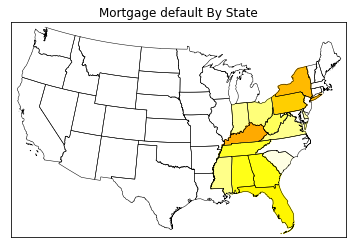

In [18]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 100000 # set range.
for shapedict in map.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename in States:
        defaults = States[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((defaults-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in States:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Mortgage default By State')
plt.show()

In [30]:
dfEcon = pd.read_csv('/Users/Maxim/Desktop/Data_Mining/Project/CA30/a.csv', low_memory=False, sep=",", header=None, names=['GeoFIPS','GeoName','Region','Table','LineCode','IndustryClassification','Description','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])
dfEcon = dfEcon[1:-53][:]
dfEcon.head()

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,1000,Alabama,5,CA30,10,...,Personal income (thousands of dollars),103105812.0,108000944.0,111693478.0,...,152246048.0,157727573.0,155513766.0,161256950.0,166595407.0,170881367.0,172789879.0,178612937.0,185484754.0,189161974.0
2,1000,Alabama,5,CA30,45,...,Net earnings by place of residence,67953207.0,70249017.0,72246488.0,...,95746088.0,96521618.0,94794563.0,96284260.0,100047681.0,102598884.0,103756956.0,106641492.0,110358001.0,112629694.0
3,1000,Alabama,5,CA30,50,...,Personal current transfer receipts,16653014.0,17749697.0,19206855.0,...,28807006.0,32196827.0,34674225.0,37939671.0,38706846.0,38882492.0,39745215.0,41347075.0,43007428.0,43949383.0
4,1000,Alabama,5,CA30,60,...,Income maintenance benefits 1/,1913390.0,1919785.0,2014629.0,...,3267368.0,3467801.0,4074183.0,4564923.0,4822853.0,4743299.0,4784836.0,4715262.0,4691092.0,4634246.0
5,1000,Alabama,5,CA30,70,...,Unemployment insurance compensation,225086.0,238118.0,326649.0,...,252597.0,419594.0,1094561.0,1163587.0,929843.0,659440.0,464044.0,268992.0,230175.0,219076.0


In [53]:
count = 0
l = []
for i in dfEcon['GeoName']:
    if i not in States:
        l.append(False)
    else:
        l.append(True)
    count+=1
dfEcon = dfEcon[l]


In [58]:
dfEcon = dfEcon.reset_index(drop=True)
display(dfEcon)

,GeoFIPS,GeoName,Region,Table,LineCode,IndustryClassification,Description,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1000,Alabama,5,CA30,10,...,Personal income (thousands of dollars),103105812.0,108000944.0,111693478.0,...,152246048.0,157727573.0,155513766.0,161256950.0,166595407.0,170881367.0,172789879.0,178612937.0,185484754.0,189161974.0
1,1000,Alabama,5,CA30,45,...,Net earnings by place of residence,67953207.0,70249017.0,72246488.0,...,95746088.0,96521618.0,94794563.0,96284260.0,100047681.0,102598884.0,103756956.0,106641492.0,110358001.0,112629694.0
2,1000,Alabama,5,CA30,50,...,Personal current transfer receipts,16653014.0,17749697.0,19206855.0,...,28807006.0,32196827.0,34674225.0,37939671.0,38706846.0,38882492.0,39745215.0,41347075.0,43007428.0,43949383.0
3,1000,Alabama,5,CA30,60,...,Income maintenance benefits 1/,1913390.0,1919785.0,2014629.0,...,3267368.0,3467801.0,4074183.0,4564923.0,4822853.0,4743299.0,4784836.0,4715262.0,4691092.0,4634246.0
4,1000,Alabama,5,CA30,70,...,Unemployment insurance compensation,225086.0,238118.0,326649.0,...,252597.0,419594.0,1094561.0,1163587.0,929843.0,659440.0,464044.0,268992.0,230175.0,219076.0
5,1000,Alabama,5,CA30,80,...,Retirement and other,14514538.0,15591794.0,16865577.0,...,25287041.0,28309432.0,29505481.0,32211161.0,32954150.0,33479753.0,34496335.0,36362821.0,38086161.0,39096061.0
6,1000,Alabama,5,CA30,90,...,"Dividends, interest, and rent 2/",18499591.0,20002230.0,20240135.0,...,27692954.0,29009128.0,26044978.0,27033019.0,27840880.0,29399991.0,29287708.0,30624370.0,32119325.0,32582897.0
7,1000,Alabama,5,CA30,100,...,Population (persons) 3/,4430141.0,4452173.0,4467634.0,...,4672840.0,4718206.0,4757938.0,4785492.0,4799918.0,4815960.0,4829479.0,4843214.0,4853875.0,4863300.0
8,1000,Alabama,5,CA30,110,...,Per capita personal income 4/,23274.0,24258.0,25001.0,...,32581.0,33430.0,32685.0,33697.0,34708.0,35482.0,35778.0,36879.0,38214.0,38896.0
9,1000,Alabama,5,CA30,120,...,Per capita net earnings 4/,15339.0,15779.0,16171.0,...,20490.0,20457.0,19923.0,20120.0,20844.0,21304.0,21484.0,22019.0,22736.0,23159.0


In [ ]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
map.readshapefile('st99_d00', name='states', drawbounds=True)
cmap = plt.cm.hot
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 100000 # set range.
for shapedict in map.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename in personalIncome["GeoName"]:
        income = dfEcon["GeoName"][statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((defaults-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance

for nshape,seg in enumerate(map.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] in States:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Mortgage default By State')
plt.show()

In [61]:
personalIncome = dfEcon[dfEcon['Description'] == "Personal income (thousands of dollars)"]
